# ProjectMovieCorrelation - Aditya Jain

#### a) Importing Libraries

In [1]:
# Importing the packages
import pandas as pd # analyzing, cleaning, exploring, and manipulating data
import numpy as np # mathematical operations
import seaborn as sns # making statistical graphics

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline # the plots are displayed inline within the notebook, rather than in a separate window or output cell
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


UsageError: unrecognized arguments: # the plots are displayed inline within the notebook, rather than in a separate window or output cell


In [3]:
# Reading the data
df = pd.read_csv(r'C:\Users\DELL\Desktop\Project\Project Movie Correlation - Python\movies.csv')

In [4]:
# Looking at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


#### b) Handling Missing data

In [5]:
# Checking if we have any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [6]:
# Checking missing data in actual numbers

print(df.isnull().sum())

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [7]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [20]:
# !pip install scikit-learn

In [8]:
# Option 1: Delete those rows

# Dropping rows where 'budget' column has missing values
df_cleaned = df.dropna(subset=['budget'])

# Display DataFrame after dropping rows
df_cleaned.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [9]:
# Checking missing data in actual numbers
print(df_cleaned.isnull().sum())


# Checking if we have any missing data
for col in df_cleaned.columns:
    pct_missing = np.mean(df_cleaned[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name         0
rating      20
genre        0
year         0
released     0
score        3
votes        3
director     0
writer       0
star         1
country      1
budget       0
gross       61
company      6
runtime      2
dtype: int64
name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 1%
company - 0%
runtime - 0%


In [10]:
# Option 2: Impute the values

from sklearn.impute import KNNImputer

# Initialize the KNN Imputer
imputer = KNNImputer(n_neighbors=10)

# Copy the original DataFrame (for further comparision bw the two)
df_imputed = df.copy()

# Select the columns to be used for imputation
columns_to_impute = ['budget', 'gross', 'score']

# Apply KNN imputation
df_imputed[columns_to_impute] = imputer.fit_transform(df_imputed[columns_to_impute])

# Display the DataFrame with imputed values
df_imputed.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [11]:
# Checking if we have any missing data

for col in df_imputed.columns:
    pct_missing = np.mean(df_imputed[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
# Checking missing data in actual numbers
print(df_imputed.isnull().sum())

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%
name         0
rating      77
genre        0
year         0
released     2
score        0
votes        3
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      4
dtype: int64


In [12]:
# Comparing rows with only imputed values

# a) Identify rows where 'budget' was imputed
imputed_rows = df['budget'].isnull()

# b) Creating a DataFrame for imputed rows with certain columns
comparison_df = pd.DataFrame({
    'movie_name': df.loc[imputed_rows, 'name'],
    'score_original': df.loc[imputed_rows, 'score'],
    'year': df.loc[imputed_rows, 'year'],
    'budget_original': df.loc[imputed_rows, 'budget'],
    'budget_imputed': df_imputed.loc[imputed_rows, 'budget'],
    'gross_original': df.loc[imputed_rows, 'gross'],
    'gross_imputed': df_imputed.loc[imputed_rows, 'gross']
})

# c) Display the comparison DataFrame
comparison_df.head()

,movie_name,score_original,year,budget_original,budget_imputed,gross_original,gross_imputed
16,Fame,6.6,1980,NaN,1987800.0,21202829.0,21202829.0
19,Stir Crazy,6.8,1980,NaN,5252500.0,101300000.0,101300000.0
24,Urban Cowboy,6.4,1980,NaN,2470500.0,46918287.0,46918287.0
25,Altered States,6.9,1980,NaN,5922800.0,19853892.0,19853892.0
26,Little Darlings,6.5,1980,NaN,5969300.0,34326249.0,34326249.0


#### c) Correcting Year Column

In [13]:
# Extract year and convert to float
df['YearCorrect'] = df['released'].str.extract(r'(\d{4})').astype(float)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980.0


In [17]:
# Check if the two columns match
df['Match'] = df['year'] == df['YearCorrect']

# Display the DataFrame with the match column
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrect,Match
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980.0,True
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980.0,True
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980.0,True
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980.0,True
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980.0,True


In [18]:
# Filter rows where Match is False
false_matches = df[df['Match'] == False][['name', 'year', 'YearCorrect']]

false_matches.head()

,name,year,YearCorrect
8,Superman II,1980,1981.0
11,The Gods Must Be Crazy,1980,1984.0
21,Heaven's Gate,1980,1981.0
33,Cattle Annie and Little Britches,1980,1981.0
40,The Watcher in the Woods,1980,1981.0


#### d) Ordering data and dropping duplicates

In [19]:
# Ordering our data
df.sort_values(by=['gross'], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrect,Match
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009.0,True
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019.0,True
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997.0,True
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015.0,True
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,2020.0,True
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020.0,True
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,2020.0,True
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,2020.0,True


In [20]:
# Dropping Duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrect,Match
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980.0,True
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980.0,True
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980.0,True
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980.0,True
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,2020.0,True
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020.0,True
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,2020.0,True
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,2020.0,True


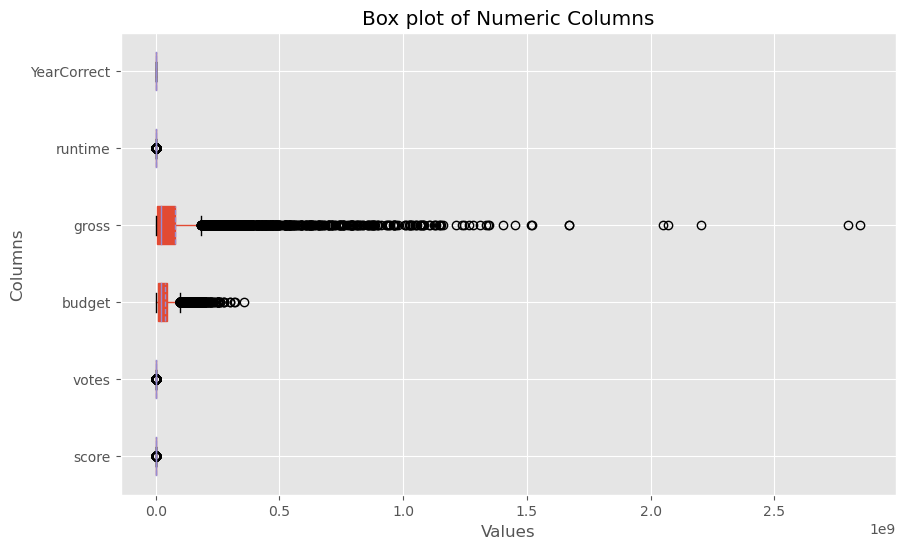

In [21]:
# Any Outliers?

# Plotting a box plot for numeric columns
numerical_columns = ['score', 'votes', 'budget', 'gross', 'runtime', 'YearCorrect']
df_box = df[numerical_columns]

# Creating the box plot
plt.figure(figsize=(10, 6))
df_box.boxplot(vert=False, patch_artist=True, meanline=True, showmeans=True)
plt.title('Box plot of Numeric Columns')
plt.xlabel('Values')
plt.ylabel('Columns')
plt.show()


In [22]:
# Displaying max numbers of rows
pd.set_option('display.max_rows', None)

#### e) Statistical Analysis

<AxesSubplot:xlabel='gross', ylabel='budget'>

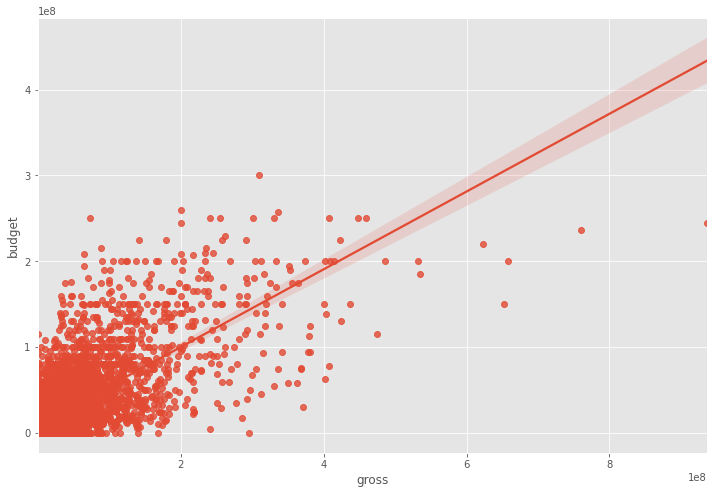

In [166]:
# a) Scatter chart with Regression line (Gross and Budget)
sns.regplot(x="gross", y="budget", data=df)

<AxesSubplot:xlabel='score', ylabel='gross'>

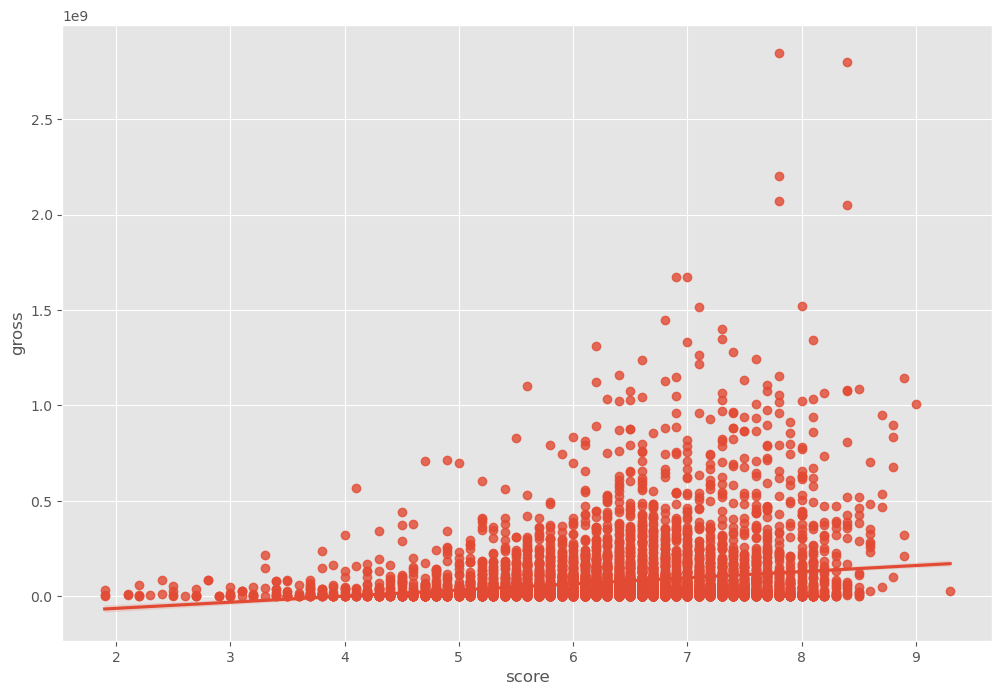

In [79]:
# b) Scatter chart with Regression line (score and Gross)
sns.regplot(x="score", y="gross", data=df)

In [82]:
# c) Correlation Matrix between all numeric columns (pearson)

df.corr(method ='pearson') # research into these

,year,score,votes,budget,gross,runtime,YearCorrect,Match
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811,0.997415,-0.012163
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451,0.105994,-0.165669
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212,0.218429,0.080450
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447,0.321918,0.180592
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216,0.250514,0.144928
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000,0.120636,-0.018272
YearCorrect,0.997415,0.105994,0.218429,0.321918,0.250514,0.120636,1.000000,-0.055025
Match,-0.012163,-0.165669,0.080450,0.180592,0.144928,-0.018272,-0.055025,1.000000


In [81]:
# d) Correlation Matrix between all numeric columns (kendall)
df.corr(method ='kendall')

,year,score,votes,budget,gross,runtime,YearCorrect,Match
year,1.000000,0.067652,0.331465,0.224120,0.200618,0.097184,0.987642,-0.009845
score,0.067652,1.000000,0.300115,-0.000566,0.086046,0.283611,0.073436,-0.150789
votes,0.331465,0.300115,1.000000,0.353702,0.548899,0.198240,0.325814,0.075703
budget,0.224120,-0.000566,0.353702,1.000000,0.512637,0.235483,0.216871,0.190249
gross,0.200618,0.086046,0.548899,0.512637,1.000000,0.168933,0.190789,0.217702
runtime,0.097184,0.283611,0.198240,0.235483,0.168933,1.000000,0.096999,-0.014291
YearCorrect,0.987642,0.073436,0.325814,0.216871,0.190789,0.096999,1.000000,-0.044701
Match,-0.009845,-0.150789,0.075703,0.190249,0.217702,-0.014291,-0.044701,1.000000


In [80]:
# e) Correlation Matrix between all numeric columns (spearman)
df.corr(method ='spearman')

,year,score,votes,budget,gross,runtime,YearCorrect,Match
year,1.000000,0.099045,0.469829,0.317336,0.293084,0.142977,0.997407,-0.011908
score,0.099045,1.000000,0.428138,-0.001403,0.126116,0.399857,0.107602,-0.181927
votes,0.469829,0.428138,1.000000,0.502466,0.742050,0.290159,0.462767,0.092504
budget,0.317336,-0.001403,0.502466,1.000000,0.693670,0.336370,0.306901,0.231051
gross,0.293084,0.126116,0.742050,0.693670,1.000000,0.246243,0.278701,0.266611
runtime,0.142977,0.399857,0.290159,0.336370,0.246243,1.000000,0.142915,-0.017339
YearCorrect,0.997407,0.107602,0.462767,0.306901,0.278701,0.142915,1.000000,-0.054066
Match,-0.011908,-0.181927,0.092504,0.231051,0.266611,-0.017339,-0.054066,1.000000


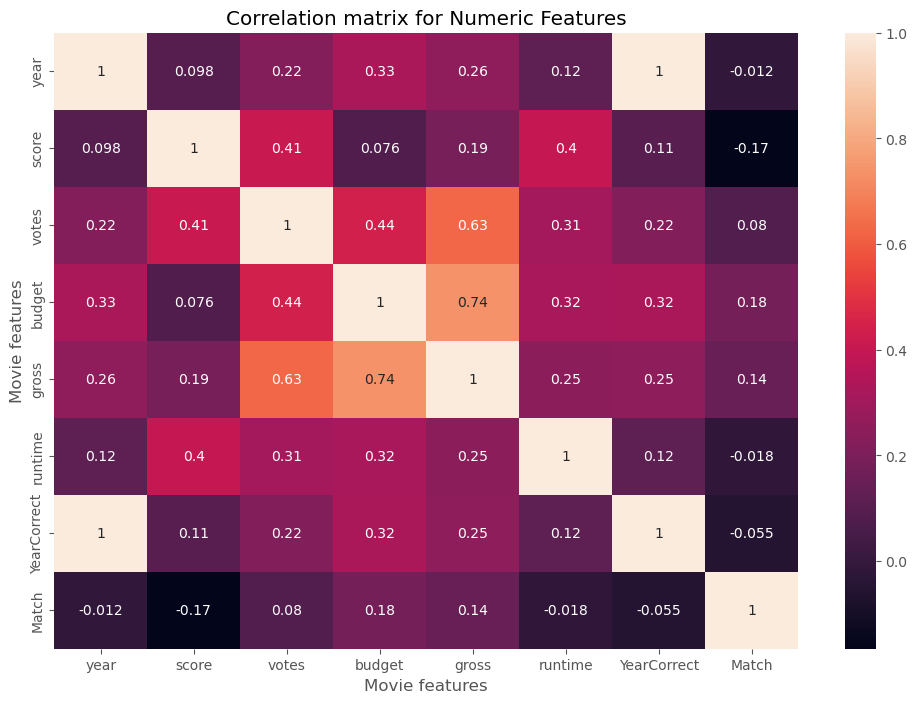

In [83]:
# f) Correlation Matrix

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [26]:
# g) Comparing categorical variables
#  factorize - (assigns a random numeric value for each unique categorical value)

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrect,Match
name,1.000000,0.143938,0.036367,0.965761,0.959015,-0.046733,0.287776,0.745905,0.805211,0.731565,0.142828,0.277488,0.947324,0.591667,0.048955,0.819948,0.021866
rating,0.143938,1.000000,-0.086723,0.156713,0.146606,0.012595,0.099972,0.085520,0.103623,0.093116,0.000494,0.193353,0.158582,-0.028035,0.032741,0.137371,-0.089590
genre,0.036367,-0.086723,1.000000,0.037184,0.035940,-0.002437,0.023285,0.047288,0.033688,0.038649,-0.015795,0.073008,0.038616,0.009566,0.001462,0.028570,-0.041163
year,0.965761,0.156713,0.037184,1.000000,0.993190,-0.044981,0.312401,0.770497,0.824770,0.756400,0.140216,0.300621,0.980873,0.601571,0.050647,0.848638,0.012163
released,0.959015,0.146606,0.035940,0.993190,1.000000,-0.045761,0.299905,0.770876,0.819617,0.754468,0.148468,0.285691,0.976423,0.607954,0.048235,0.840589,0.022037
score,-0.046733,0.012595,-0.002437,-0.044981,-0.045761,1.000000,-0.009749,-0.022687,-0.034685,-0.009896,0.023097,-0.012642,-0.047041,-0.028432,0.026436,-0.038776,-0.040074
votes,0.287776,0.099972,0.023285,0.312401,0.299905,-0.009749,1.000000,0.192220,0.224122,0.179601,-0.045914,0.398519,0.286180,0.008900,0.106024,0.276969,-0.079588
director,0.745905,0.085520,0.047288,0.770497,0.770876,-0.022687,0.192220,1.000000,0.748340,0.682385,0.155471,0.106617,0.750911,0.552258,-0.011070,0.641912,0.043826
writer,0.805211,0.103623,0.033688,0.824770,0.819617,-0.034685,0.224122,0.748340,1.000000,0.675685,0.157202,0.187238,0.805576,0.546151,0.032264,0.706832,0.040508
star,0.731565,0.093116,0.038649,0.756400,0.754468,-0.009896,0.179601,0.682385,0.675685,1.000000,0.182045,0.107991,0.735680,0.527116,0.035392,0.638927,0.052350


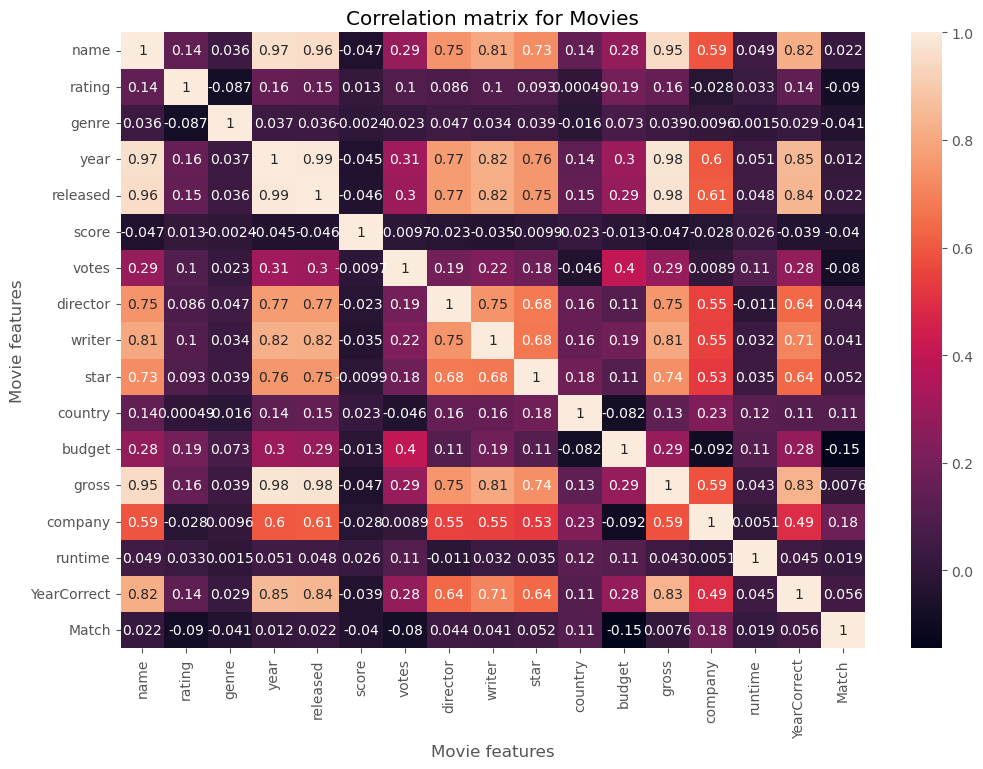

In [84]:
# h) Plotting a full correlation heatmap with categorical data as well.
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [91]:
# i) Unstacking and one to one view of correlation.
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()
corr_pairs = correlation_mat.unstack()
corr_pairs.head()
#print(corr_pairs)

name  name        1.000000
      rating      0.143938
      genre       0.036367
      year        0.965761
      released    0.959015
dtype: float64

In [89]:
#j) Sorting correlation pairs one to one.
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
sorted_pairs.head()
#print(sorted_pairs)

budget   Match     -0.145122
Match    budget    -0.145122
company  budget    -0.092249
budget   company   -0.092249
rating   Match     -0.089590
dtype: float64

In [90]:
# k) Sorting correlation pairs one to one that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
strong_pairs.head()
#print(strong_pairs)

star     company     0.527116
company  star        0.527116
         writer      0.546151
writer   company     0.546151
company  director    0.552258
dtype: float64

In [92]:
# l) Looking at the top 15 companies by gross revenue (company)

CompanyGrossSum = df.groupby('company')[["gross"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 
CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [94]:
# m) Looking at the top 15 companies by gross revenue (company and year)
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 
CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Name: gross, dtype: int64

In [95]:
# n) Looking at the top 15 companies by gross revenue (company)

CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 
CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

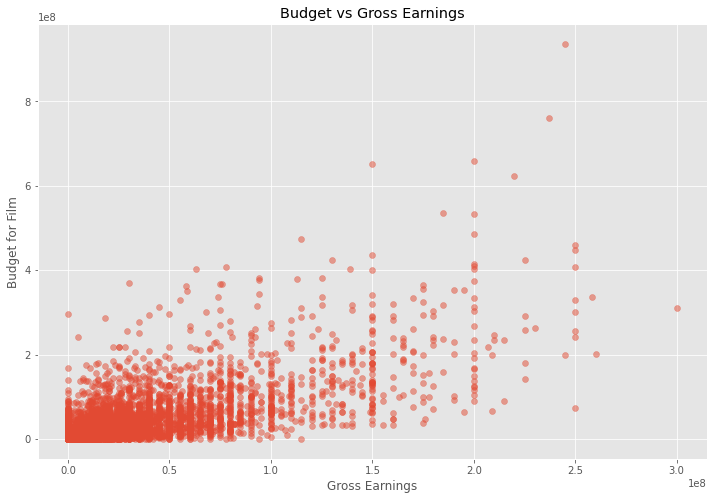

In [184]:
# o) Scatter plot to visualize the relationship between the budget and the gross earnings.

plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [96]:
# p) Encoding categorical variables in df_numerized df

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrect,Match,Year
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,1980.0,True,14
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,1980.0,True,13
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,1980.0,True,14
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,1980.0,True,13
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,1980.0,True,13


In [97]:
# q) Correlation in df numerized

df_numerized.corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrect,Match,Year
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392,0.010699,0.003614,-0.011725
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145,0.006741,-0.046430,0.013475
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711,-0.077911,-0.110644,0.028397
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811,0.997415,-0.012163,-0.001562
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868,-0.004644,0.110840,0.993694
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451,0.105994,-0.165669,0.040993
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212,0.218429,0.080450,0.017337
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624,-0.020422,-0.019467,-0.000105
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511,-0.008611,-0.008093,-0.002892
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174,-0.027611,0.019237,0.015406


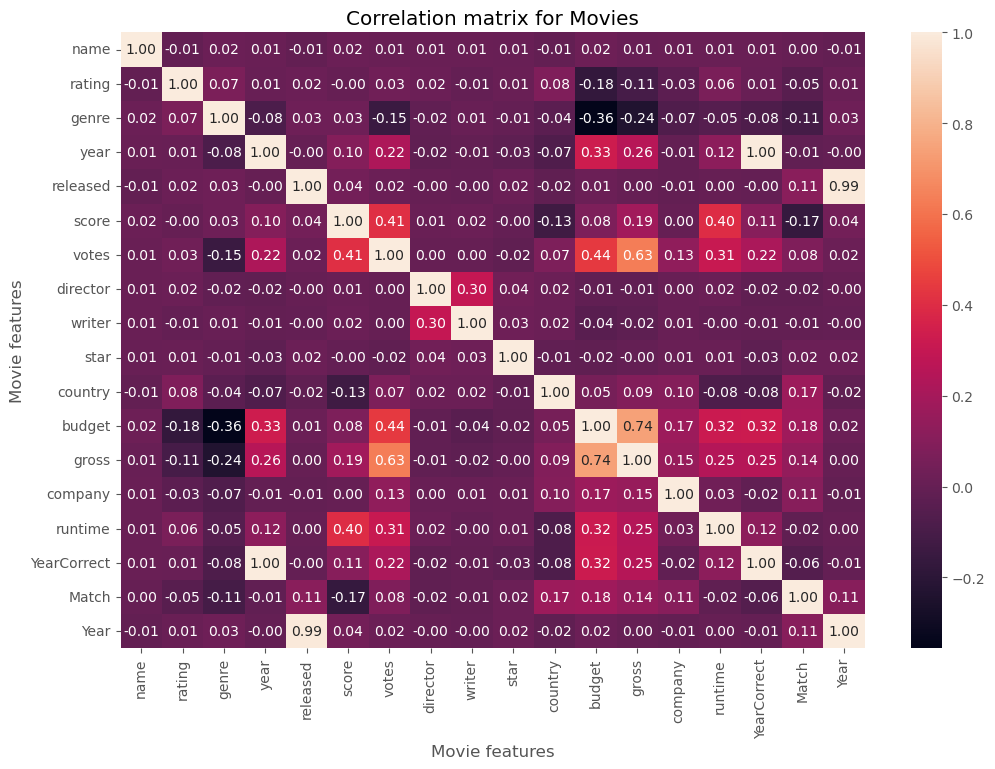

In [99]:
# r) Correlation matrix of df_numerized

correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True, fmt=".2f")
plt.title("Correlation matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [ ]:
# s) Swarm plot visualizing the distribution of gross earnings across different movie ratings. 
# (Note: Took a very long time to run , so discarding it)

#sns.swarmplot(x="rating", y="gross", data=df, size=3)
#plt.title('Gross Earnings by Rating')
#plt.xlabel('Rating')
#plt.ylabel('Gross Earnings')
#plt.show()

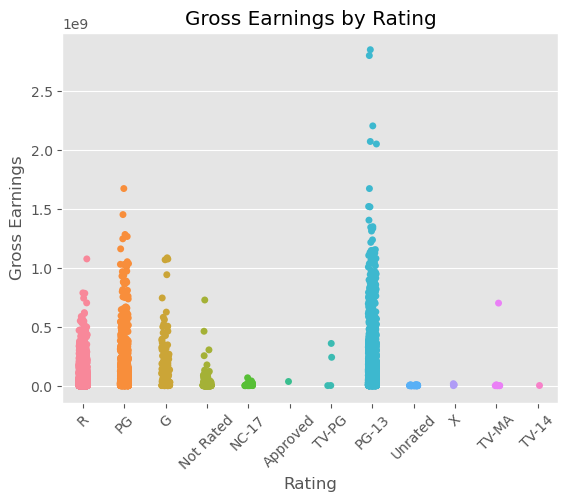

In [5]:
# t) Strip plot visualizing the distribution of gross earnings across different movie ratings.

sns.stripplot(x="rating", y="gross", data=df)
plt.xticks(rotation=45)
plt.title('Gross Earnings by Rating')
plt.xlabel('Rating')
plt.ylabel('Gross Earnings')
plt.show()